# 작업준비
* 데이터 수집 : https://www.kaggle.com/competitions/bike-sharing-demand/data

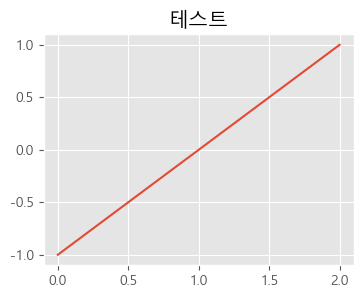

In [ ]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
plt.style.use('ggplot')

import sklearn as sk

# 한글폰트 설정
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

pd.Series([-1,0,1]).plot(figsize=(4,3), title='테스트')
plt.show()

# 데이터 불러오기
* **`pd.read_csv(csv파일 경로, parse_dates=[datetime형식으로 불러올 컬럼])`**

* 속성 정보
    * `datetime` - 시간대별 데이터 제공. timestamp(날짜와 시간 결합) 형태
    * `season`  - 1 = spring, 2 = summer, 3 = fall, 4 = winter
    * `holiday` - 공휴일(주말이 아닌 빨간날). 1-yes, 2-no
    * `workingday` - 주말, 공휴일을 제외한 날 1-yes, 2-no
    * `weather`
        * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    * `temp` - 섭씨온도
    * `atemp` - 섭씨체감온도
    * `humidity` - 상대습도
    * `windspeed` - 풍속
    * `casual` - 비회원 대여량
    * `registered` - 회원 대여량
    * `count` - 총 대여량


In [2]:
# datetime 컬럼은 datetime 형식으로 읽어오도록 옵션 설정
df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/BikeSharingDemand.csv', parse_dates=['datetime'])
# df = pd.read_csv('data/bike_sharing_demand.csv', parse_dates=['datetime']) 
# parse_dates=['datetime'] 로 자동으로 시간으로 변경
display(df.head(3))
display(df.tail(3))

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [3]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


# 파생컬럼 추가

In [4]:
# 연, 월, 일, 시, 요일
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek # 월요일:0, 일요일:6
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


# 데이터 탐색(EDA)
* 데이터의 품질 확인(값의 분포, 결측치, 이상치 등)
* 독립변수와 종속변수간의 관계를 중점적으로 탐색

## datetime

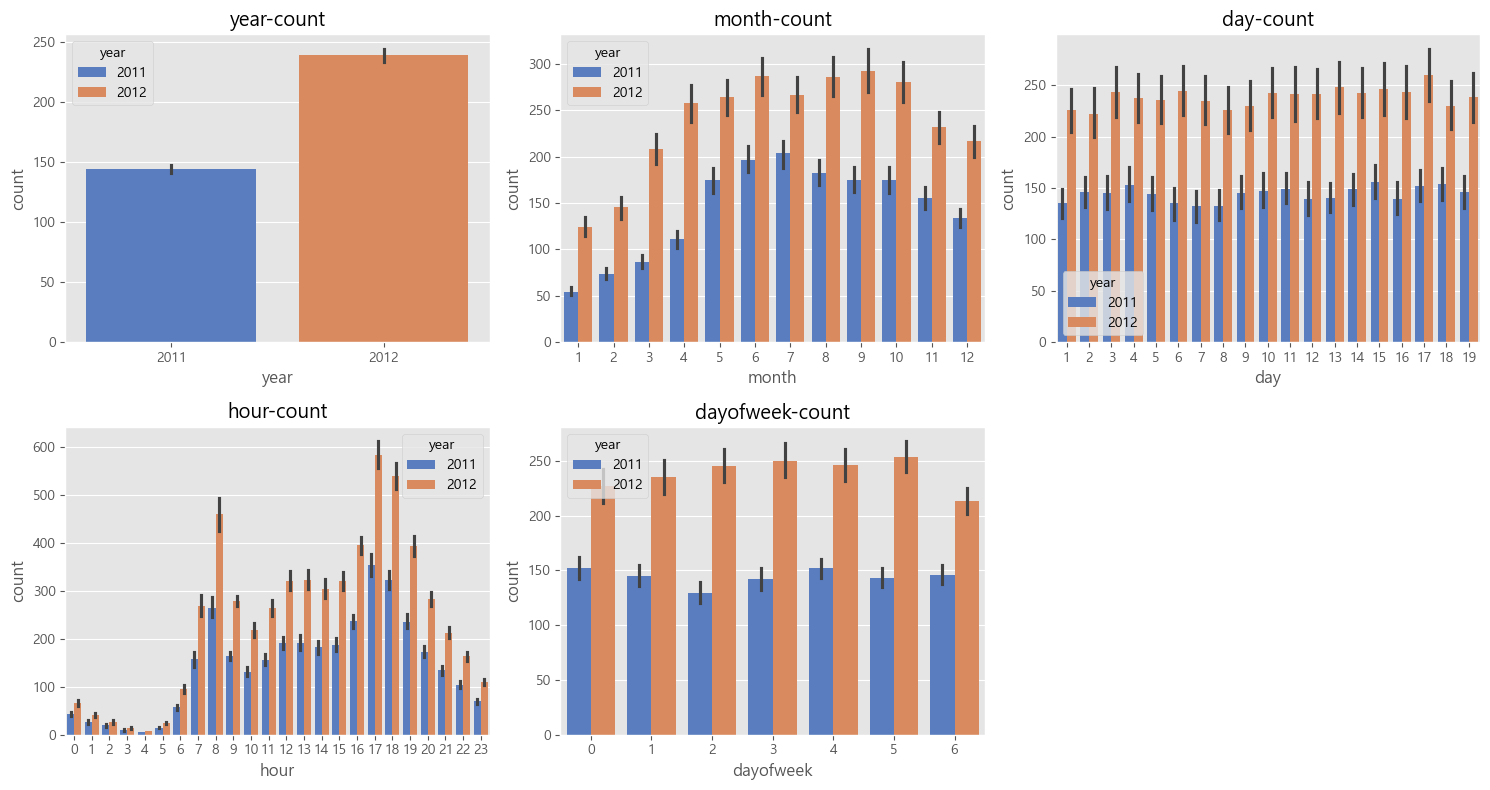

In [5]:
plt.figure(figsize=(15,8))

features = ['year','month','day','hour','dayofweek']

for i, feature in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.barplot(data=df, x=feature, y='count', estimator='mean', hue='year', palette='muted')
    # estimator의 기본값은 평균 
    plt.title(feature+'-count')

plt.tight_layout()

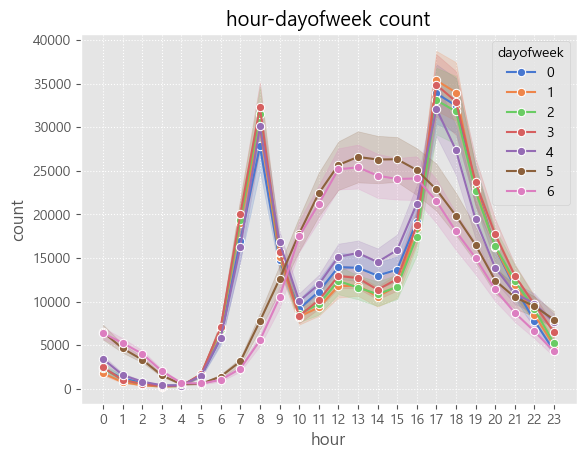

In [6]:
# 시간대 - 요일 별 대여량
sns.lineplot(data=df, x='hour', y='count', marker='o', hue='dayofweek', estimator='sum', palette='muted')
plt.title('hour-dayofweek count')
plt.xticks(range(0,24))
plt.grid(ls=':')
plt.show()

## season
* 1 - 1,2,3월
* 2 - 4,5,6월
* 3 - 7,8,9월
* 4 - 10,11,12월

In [7]:
df[['month', 'season']].drop_duplicates()

,month,season
0,1,1
431,2,1
877,3,1
1323,4,2
1778,5,2
2234,6,2
2690,7,3
3146,8,3
3602,9,3
4055,10,4


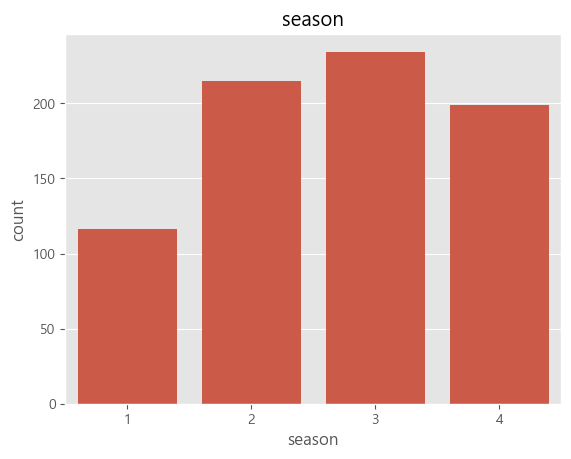

In [8]:
sns.barplot(data=df, x='season', y='count', errorbar=None)
plt.title('season')
plt.show()

<Axes: xlabel='month', ylabel='mean temp'>

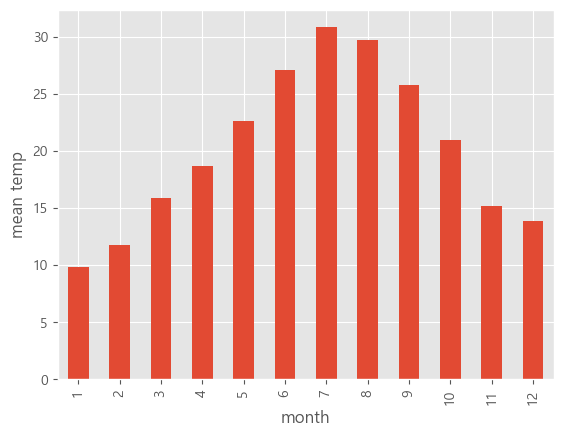

In [9]:
# 월별 평균 기온
df.groupby('month')['temp'].mean().plot.bar(ylabel='mean temp')

<Axes: xlabel='month', ylabel='count'>

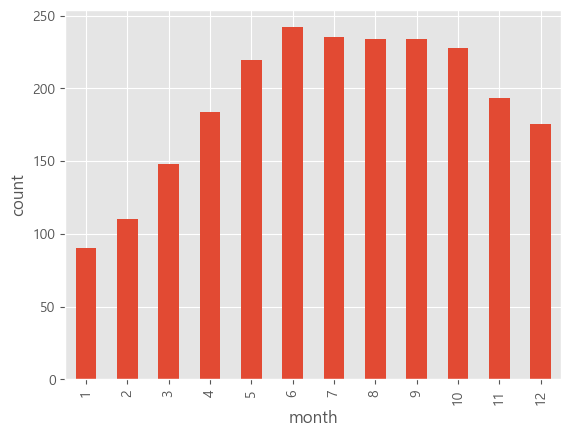

In [15]:
# 월별 평균 대여량
df.groupby('month')['count'].mean().plot.bar(ylabel='count')

## holiday
* 공휴일(평일 중 빨간날)
* 토,일은 원래 쉬는 날로, holiday로 간주하지 않음
* 공휴일과 비공휴일의 날짜수의 차이가 있으므로, 평균 대여량으로 비교한다.

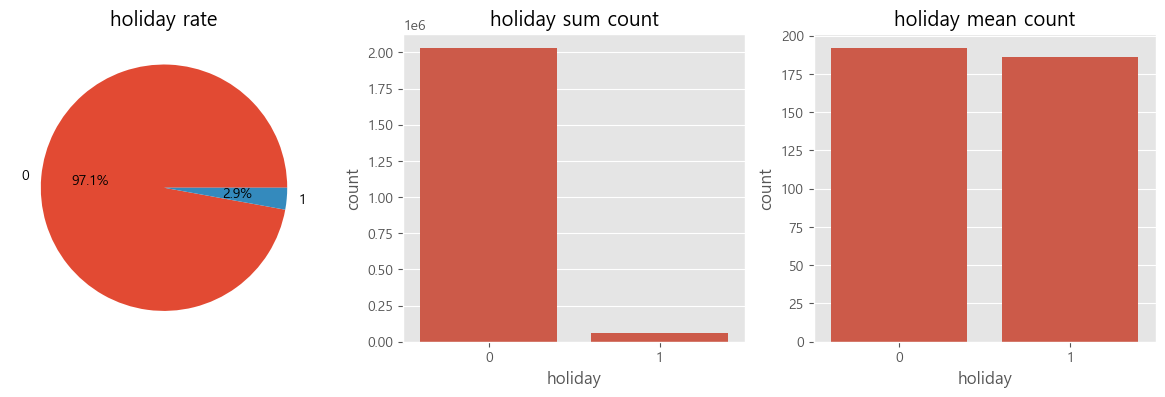

In [11]:
plt.figure(figsize=(15,4))

plt.subplot(131)
plt.pie(df['holiday'].value_counts(), autopct='%.1f%%', labels=['0','1'])
plt.title('holiday rate')

plt.subplot(132)
sns.barplot(data=df, x='holiday', y='count', errorbar=None, estimator='sum')
plt.title('holiday sum count')

plt.subplot(133)
sns.barplot(data=df, x='holiday', y='count', errorbar=None, estimator='mean')
plt.title('holiday mean count')

plt.show()

## workingday
* 평일 중 holiday를 제외한 날이 workingday
* workingday와 non-workingday의 날짜수의 차이가 있으므로, 평균 대여량으로 비교한다.

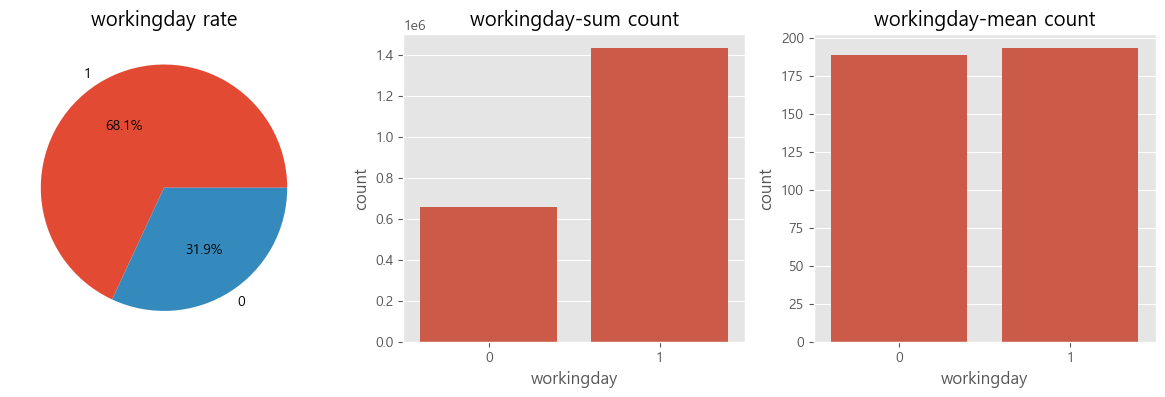

In [12]:
plt.figure(figsize=(15,4))

plt.subplot(131)
plt.pie(df['workingday'].value_counts(), autopct='%.1f%%', labels=['1','0'])
plt.title('workingday rate')

plt.subplot(132)
sns.barplot(data=df, x='workingday', y='count', errorbar=None, estimator='sum')
plt.title('workingday-sum count')

plt.subplot(133)
sns.barplot(data=df, x='workingday', y='count', errorbar=None, estimator='mean')
plt.title('workingday-mean count')

plt.show()

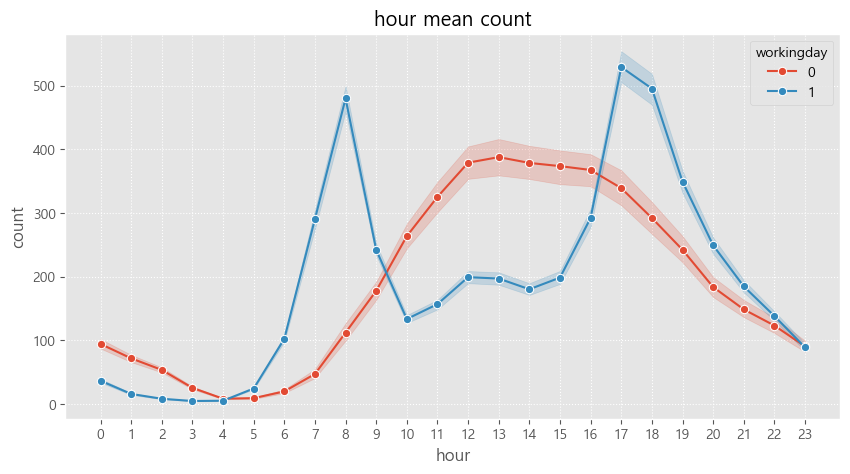

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='hour', y='count', marker='o', hue='workingday')
plt.title('hour mean count')
plt.xticks(range(0,24))
plt.grid(ls=':')
plt.show()

## weather
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mis
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clou
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow +    Fog
* weather가 4인 날은 단 하루밖에 없었음

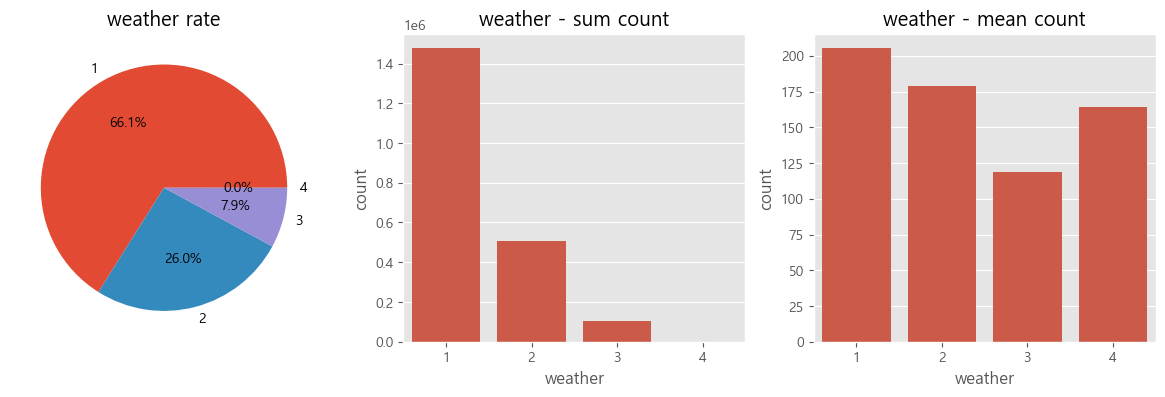

In [14]:
plt.figure(figsize=(15,4))

plt.subplot(131)
plt.pie(df['weather'].value_counts(), autopct='%.1f%%', labels=[1,2,3,4])
plt.title('weather rate')

plt.subplot(132)
sns.barplot(data=df, x='weather', y='count', errorbar=None, estimator='sum')
plt.title('weather - sum count')

plt.subplot(133)
sns.barplot(data=df, x='weather', y='count', errorbar=None, estimator='mean')
plt.title('weather - mean count')

plt.show()

In [ ]:
df['weather'].value_counts()

## temp

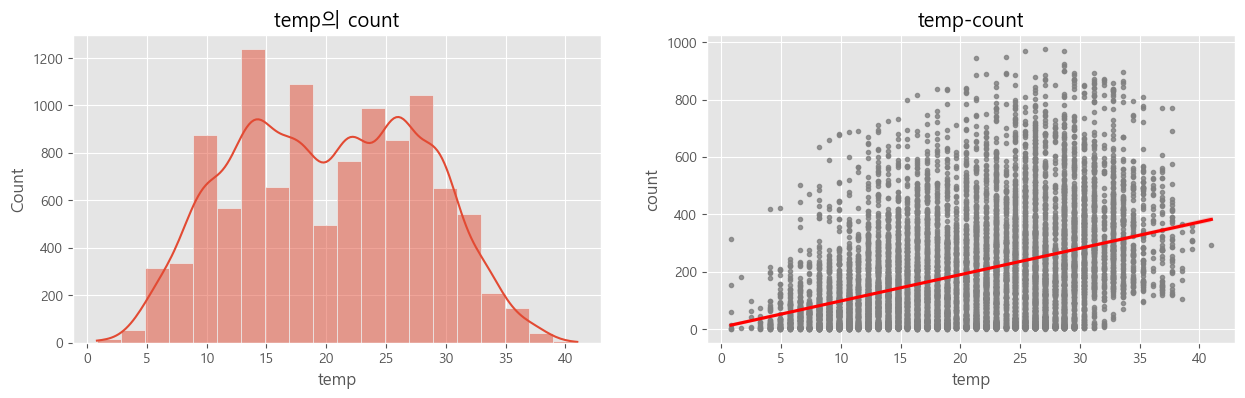

In [18]:
plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(df['temp'], bins=20, kde=True)
plt.title('temp의 count')

plt.subplot(122)
sns.regplot(data=df, x='temp', y='count', color='gray', line_kws={'color':'red'}, marker='.')
plt.title('temp-count')

plt.show()

## atemp

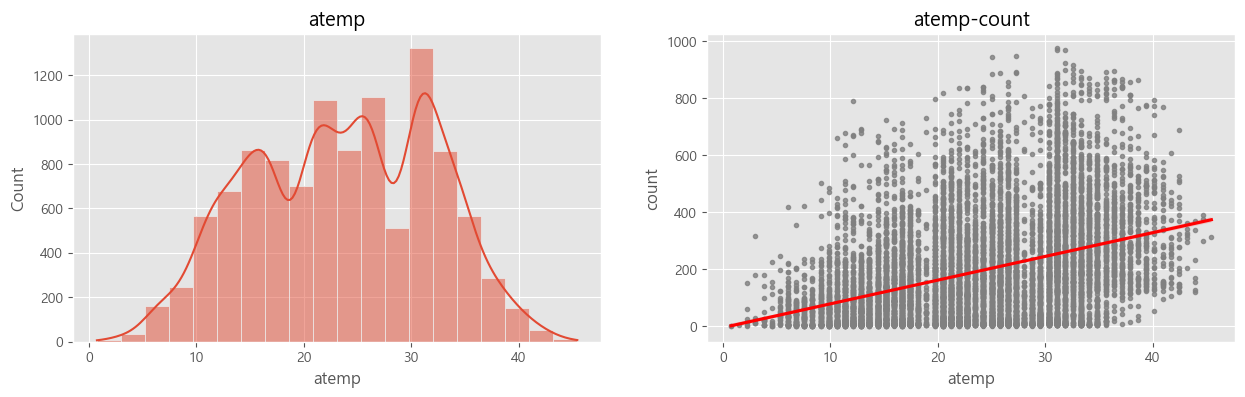

In [17]:
plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(df['atemp'], bins=20, kde=True)
plt.title('atemp')


plt.subplot(122)
sns.regplot(data=df, x='atemp', y='count', color='gray', line_kws={'color':'red'}, marker='.')
plt.title('atemp-count')

plt.show()

## humidity


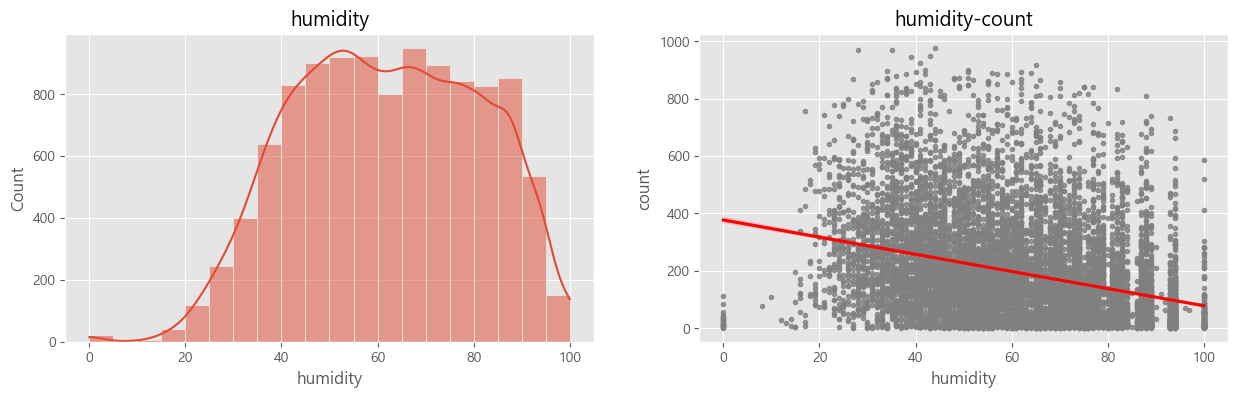

In [19]:
plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(df['humidity'], bins=20, kde=True)
plt.title('humidity')

plt.subplot(122)
sns.regplot(data=df, x='humidity', y='count', color='gray', line_kws={'color':'red'}, marker='.')
plt.title('humidity-count')

plt.show()

## windspeed
* value가 0인 데이터가 10% 이상
    * 풍속이 0인 경우는 없다고 보고, 해당 값은 결측이라고 본다.
* windspeed의 값이 0인 데이터들은 결측치가 0으로 채워진 상태인 것으로 파악
* feature engineering 필요

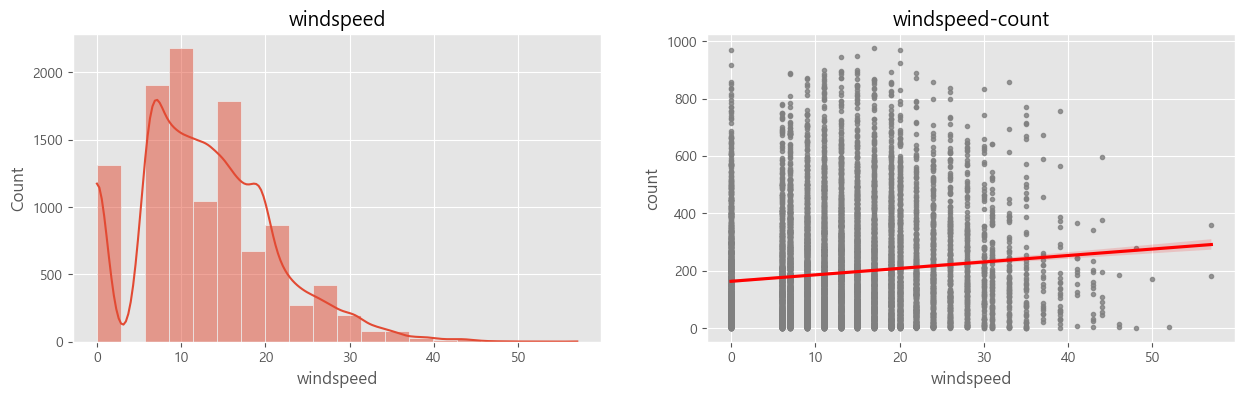

In [20]:
plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(df['windspeed'], bins=20, kde=True)
plt.title('windspeed')

plt.subplot(122)
sns.regplot(data=df, x='windspeed', y='count', color='gray', line_kws={'color':'red'}, marker='.')
plt.title('windspeed-count')

plt.show()

## casual, registered, count

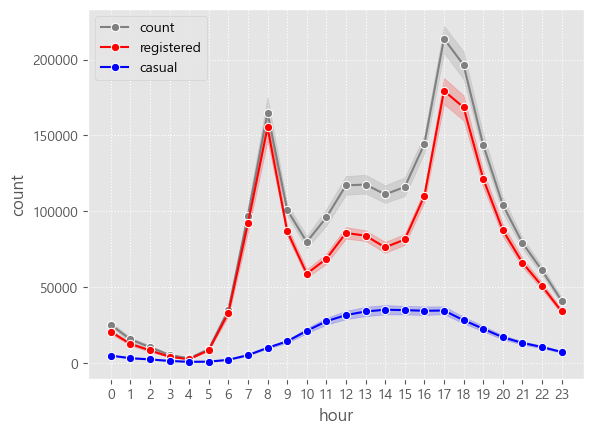

In [21]:
sns.lineplot(data=df, x='hour', y='count', color='gray', marker='o', estimator='sum', label='count')
sns.lineplot(data=df, x='hour', y='registered', color='red', marker='o', estimator='sum', label='registered')
sns.lineplot(data=df, x='hour', y='casual', color='blue', marker='o', estimator='sum', label='casual')
plt.legend()
plt.xticks(range(0,24))
plt.grid(ls=':')
plt.show()

## 상관계수
* 피어슨 상관계수
    * 두 변수 간의 선형 관계의 강도와 방향을 측정.
    * 파이썬에서 corr()함수를 이용하여 구할 수 있음.
    * +1과 -1 사이의 값을 가진다.
        * +1 : 완벽한 양의 선형 상관 관계
        * -1 : 완벽한 음의 상관관계
        * 0 : 선형 상관 관계 없음,
    
* 다중공선성
    * 독립변수 간 강한 상관관계가 있는 경우
    * 둘중 하나의 변수만 사용

<Axes: >

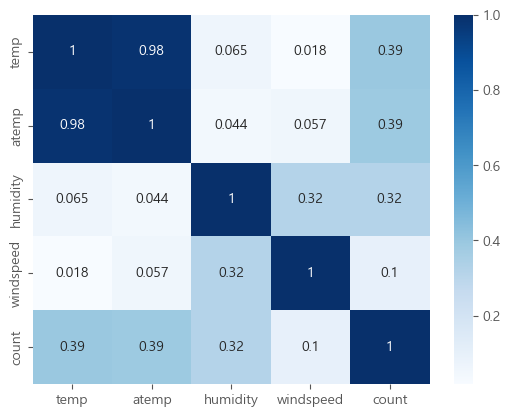

In [ ]:
corr = df[['temp','atemp','humidity','windspeed','count']].corr()
sns.heatmap(abs(corr), cmap='Blues',annot=True)  ## 음의 상관관계도 있으므로 abs() 처리

temp - atemp 는 다중공선성 존재 : 상관계수 0.98

둘 중 하나만 선택해서 사용 하거나 PCA 등으로 하나로 만드는 방법도 있음

# LinearRegression

In [44]:
# 변수선택
X = df[['hour','temp','humidity','windspeed','season','workingday','dayofweek']]
y = df['count']

In [45]:
# 훈련세트/테스트세트 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8164, 7), (2722, 7), (8164,), (2722,))

In [46]:
# 모델 생성
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [47]:
# 테스트데이터로 예측
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

predict = lr.predict(X_test)

# 모델 성능 평가

mse = mean_squared_error(y_test, predict)
rmse = root_mean_squared_error(y_test, predict)
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)

print(f'MSE : {mse:.2f}')
print(f'RMSE : {rmse:.2f}')
print(f'MAE : {mae:.2f}')
print(f'R2 : {r2:.2f}')

MSE : 22820.95
RMSE : 151.07
MAE : 111.12
R2 : 0.31


## 원핫인코딩

In [48]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  dayofweek   10886 non-

In [86]:
# 범주형변수 원핫인코딩
## temp와 atemp는 다중공선성이 강하므로 하나만 선택
## casual, registered는 독립변수의 성격이 아니므로 미선택
## datetime은 타입문제로 미선택

X= df[['holiday', 'workingday', 'weather', 'temp',\
        'humidity', 'windspeed','year', 'month', 'day', 'hour', 'dayofweek',\
        'season'
        ]]
y3 = df['count']

# 범주형 변수 원핫인코딩 :: 판다스에 있는 pd.get_dummies()를 사용하면, 원핫인코딩을 해준다.
X_one = pd.get_dummies(X, columns=['year','month','dayofweek','hour','weather','season'])

In [87]:
# 훈련세트/테스트세트 분할
from sklearn.model_selection import train_test_split

X_one_train, X_one_test, y_one_train, y_one_test = train_test_split(X_one, y3)





In [88]:
# 모델 생성
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_one_train, y_one_train)


LinearRegression()

In [89]:
# 모델 성능 평가
pred = model.predict(X_one_test)


In [90]:
pred

array([-60.0752219 , 333.04011609, 242.99330917, ..., -12.34679378,
       350.07684243, 277.46011844], shape=(2722,))

In [91]:
y_one_test

1374      11
4410     238
7129     421
6054     138
10034    340
        ... 
7360     121
10090    372
1303       3
7295     627
8580     319
Name: count, Length: 2722, dtype: int64

In [92]:

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

mse2 = mean_squared_error(y_one_test, pred)
rmse2 = root_mean_squared_error(y_one_test, pred)
mae2 = mean_absolute_error(y_one_test, pred)
r2_2 = r2_score(y_one_test, pred)

print(f'MSE : {mse2:.2f}')
print(f'RMSE : {rmse2:.2f}')
print(f'MAE : {mae2:.2f}')
print(f'R2 : {r2_2:.2f}')


MSE : 9892.09
RMSE : 99.46
MAE : 73.60
R2 : 0.70


## 종속변수 로그변환

<Axes: >

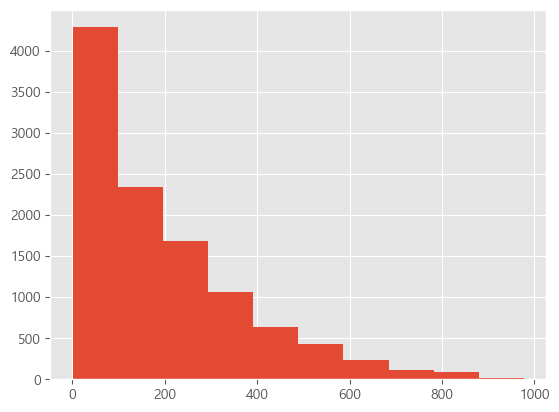

In [93]:
y.hist()

<Axes: >

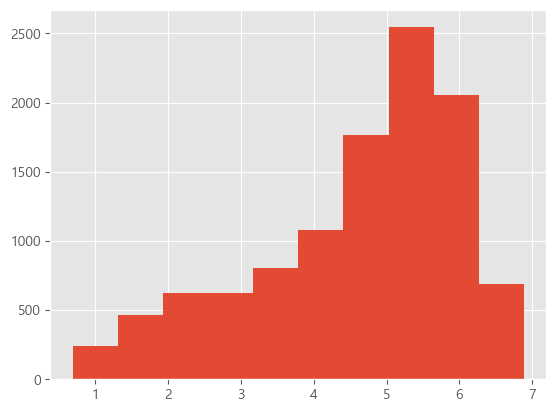

In [96]:
y_log = np.log1p(y)
y_log.hist()

In [100]:
from sklearn.model_selection import train_test_split

X_one2_train, X_one2_test, y_one2_train, y_one2_test = train_test_split(X_one, y_log)

from sklearn.linear_model import LinearRegression
model3 = LinearRegression()

model3.fit(X_one2_train, y_one2_train)

pred2 = model3.predict(X_one2_test)


In [102]:
## 로그 역변환
pred_original = np.expm1(pred2)
y_test_original = np.expm1(y_one2_test)

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

mse3 = mean_squared_error(y_test_original, pred_original)
rmse3 = root_mean_squared_error(y_test_original, pred_original)
mae3 = mean_absolute_error(y_test_original, pred_original)
r2_3 = r2_score(y_test_original, pred_original)

print(f'MSE : {mse3:.2f}')
print(f'RMSE : {rmse3:.2f}')
print(f'MAE : {mae3:.2f}')
print(f'R2 : {r2_3:.2f}')


MSE : 8652.40
RMSE : 93.02
MAE : 60.38
R2 : 0.73


## cross validation

In [103]:
X4= df[['holiday', 'workingday', 'weather', 'temp',\
        'humidity', 'windspeed','year', 'month', 'day', 'hour', 'dayofweek',\
        'season'
        ]]
y4 = df['count']

# 범주형 변수 원핫인코딩 :: 판다스에 있는 pd.get_dummies()를 사용하면, 원핫인코딩을 해준다.
X4_one = pd.get_dummies(X, columns=['year','month','dayofweek','hour','weather','season'])

### 교차검증

In [113]:
model4 = LinearRegression()
y_yuk = np.expm1(y_log)

from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True)
print(f'일반독립변수&일반종속변수 : {cross_val_score(model4, X4, y4, scoring='r2', cv=kf)}')
print(f'일반독립변수&로그변환종속변수 : {cross_val_score(model4, X4, y_log, scoring='r2', cv=kf)}')
print(f'일반독립변수&로그역변환종속변수 : {cross_val_score(model4, X4, y_yuk, scoring='r2', cv=kf)}')
print(f'원핫인코딩독립변수&일반종속변수 : {cross_val_score(model4, X4_one, y4, scoring='r2', cv=kf)}')
print(f'원핫인코딩독립변수&로그변환종속변수 : {cross_val_score(model4, X4_one, y_log, scoring='r2', cv=kf)}')
print(f'원핫인코딩독립변수&로그역변환종속변수 : {cross_val_score(model4, X4_one, y_yuk, scoring='r2', cv=kf)}')
print()
print(f'일반독립변수&일반종속변수 평균 : {cross_val_score(model4, X4, y4, scoring='r2', cv=kf).mean()}')
print(f'일반독립변수&로그변환종속변수 평균 : {cross_val_score(model4, X4, y_log, scoring='r2', cv=kf).mean()}')
print(f'일반독립변수&로그역변환종속변수 평균 : {cross_val_score(model4, X4, y_yuk, scoring='r2', cv=kf).mean()}')
print(f'원핫인코딩독립변수&일반종속변수 평균 : {cross_val_score(model4, X4_one, y4, scoring='r2', cv=kf).mean()}')
print(f'원핫인코딩독립변수&로그변환종속변수 평균 : {cross_val_score(model4, X4_one, y_log, scoring='r2', cv=kf).mean()}')
print(f'원핫인코딩독립변수&로그역변환종속변수 평균 : {cross_val_score(model4, X4_one, y_yuk, scoring='r2', cv=kf).mean()}')

일반독립변수&일반종속변수 : [0.41381148 0.38807231 0.37656103 0.36333469 0.3922819 ]
일반독립변수&로그변환종속변수 : [0.48957908 0.48422583 0.49923715 0.4906322  0.46086177]
일반독립변수&로그역변환종속변수 : [0.39189942 0.38431592 0.38310294 0.38308103 0.39011026]
원핫인코딩독립변수&일반종속변수 : [0.68978937 0.69341966 0.68397837 0.70415689 0.68642273]
원핫인코딩독립변수&로그변환종속변수 : [0.83467165 0.82105024 0.84121744 0.82785497 0.8351    ]
원핫인코딩독립변수&로그역변환종속변수 : [0.69389767 0.69636472 0.67810958 0.70084212 0.68953111]

일반독립변수&일반종속변수 평균 : 0.38528710510210407
일반독립변수&로그변환종속변수 평균 : 0.4849421299830633
일반독립변수&로그역변환종속변수 평균 : 0.3863054042891093
원핫인코딩독립변수&일반종속변수 평균 : 0.6910059935897661
원핫인코딩독립변수&로그변환종속변수 평균 : 0.8319072199387684
원핫인코딩독립변수&로그역변환종속변수 평균 : 0.6912872939710186


# 다른 모델과 비교

### K최근접이웃

In [114]:
from sklearn.neighbors import KNeighborsRegressor
modelKN = KNeighborsRegressor()

from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True)
print(f'일반독립변수&일반종속변수 : {cross_val_score(modelKN, X4, y4, scoring='r2', cv=kf)}')
print(f'일반독립변수&로그변환종속변수 : {cross_val_score(modelKN, X4, y_log, scoring='r2', cv=kf)}')
print(f'일반독립변수&로그역변환종속변수 : {cross_val_score(modelKN, X4, y_yuk, scoring='r2', cv=kf)}')
print(f'원핫인코딩독립변수&일반종속변수 : {cross_val_score(modelKN, X4_one, y4, scoring='r2', cv=kf)}')
print(f'원핫인코딩독립변수&로그변환종속변수 : {cross_val_score(modelKN, X4_one, y_log, scoring='r2', cv=kf)}')
print(f'원핫인코딩독립변수&로그역변환종속변수 : {cross_val_score(modelKN, X4_one, y_yuk, scoring='r2', cv=kf)}')
print()
print(f'일반독립변수&일반종속변수 평균 : {cross_val_score(modelKN, X4, y4, scoring='r2', cv=kf).mean()}')
print(f'일반독립변수&로그변환종속변수 평균 : {cross_val_score(modelKN, X4, y_log, scoring='r2', cv=kf).mean()}')
print(f'일반독립변수&로그역변환종속변수 평균 : {cross_val_score(modelKN, X4, y_yuk, scoring='r2', cv=kf).mean()}')
print(f'원핫인코딩독립변수&일반종속변수 평균 : {cross_val_score(modelKN, X4_one, y4, scoring='r2', cv=kf).mean()}')
print(f'원핫인코딩독립변수&로그변환종속변수 평균 : {cross_val_score(modelKN, X4_one, y_log, scoring='r2', cv=kf).mean()}')
print(f'원핫인코딩독립변수&로그역변환종속변수 평균 : {cross_val_score(modelKN, X4_one, y_yuk, scoring='r2', cv=kf).mean()}')

일반독립변수&일반종속변수 : [0.56134425 0.56705675 0.58028895 0.54013241 0.53610196]
일반독립변수&로그변환종속변수 : [0.66102929 0.66613901 0.65745596 0.66236294 0.66270917]
일반독립변수&로그역변환종속변수 : [0.56251636 0.54434993 0.58582503 0.53093548 0.5591783 ]
원핫인코딩독립변수&일반종속변수 : [0.29672371 0.22798082 0.29040824 0.30877371 0.22603163]
원핫인코딩독립변수&로그변환종속변수 : [0.25687761 0.27136366 0.24821016 0.26472667 0.26717645]
원핫인코딩독립변수&로그역변환종속변수 : [0.27680621 0.2648202  0.23984555 0.28780223 0.2784343 ]

일반독립변수&일반종속변수 평균 : 0.5535414778232555
일반독립변수&로그변환종속변수 평균 : 0.6563296089768753
일반독립변수&로그역변환종속변수 평균 : 0.5581293586653648
원핫인코딩독립변수&일반종속변수 평균 : 0.27172480435622015
원핫인코딩독립변수&로그변환종속변수 평균 : 0.253606722701265
원핫인코딩독립변수&로그역변환종속변수 평균 : 0.2666283663464889


### 의사결정 트리

In [117]:
from sklearn.tree import DecisionTreeRegressor
modelDT = DecisionTreeRegressor()

from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True)
print(f'일반독립변수&일반종속변수 : {cross_val_score(modelDT, X4, y4, scoring='r2', cv=kf)}')
print(f'일반독립변수&로그변환종속변수 : {cross_val_score(modelDT, X4, y_log, scoring='r2', cv=kf)}')
print(f'일반독립변수&로그역변환종속변수 : {cross_val_score(modelDT, X4, y_yuk, scoring='r2', cv=kf)}')
print(f'원핫인코딩독립변수&일반종속변수 : {cross_val_score(modelDT, X4_one, y4, scoring='r2', cv=kf)}')
print(f'원핫인코딩독립변수&로그변환종속변수 : {cross_val_score(modelDT, X4_one, y_log, scoring='r2', cv=kf)}')
print(f'원핫인코딩독립변수&로그역변환종속변수 : {cross_val_score(modelDT, X4_one, y_yuk, scoring='r2', cv=kf)}')
print()
print(f'일반독립변수&일반종속변수 평균 : {cross_val_score(modelDT, X4, y4, scoring='r2', cv=kf).mean()}')
print(f'일반독립변수&로그변환종속변수 평균 : {cross_val_score(modelDT, X4, y_log, scoring='r2', cv=kf).mean()}')
print(f'일반독립변수&로그역변환종속변수 평균 : {cross_val_score(modelDT, X4, y_yuk, scoring='r2', cv=kf).mean()}')
print(f'원핫인코딩독립변수&일반종속변수 평균 : {cross_val_score(modelDT, X4_one, y4, scoring='r2', cv=kf).mean()}')
print(f'원핫인코딩독립변수&로그변환종속변수 평균 : {cross_val_score(modelDT, X4_one, y_log, scoring='r2', cv=kf).mean()}')
print(f'원핫인코딩독립변수&로그역변환종속변수 평균 : {cross_val_score(modelDT, X4_one, y_yuk, scoring='r2', cv=kf).mean()}')

일반독립변수&일반종속변수 : [0.91093784 0.89596673 0.90562134 0.90187155 0.8863224 ]
일반독립변수&로그변환종속변수 : [0.91280875 0.91737341 0.90981675 0.90501455 0.91017234]
일반독립변수&로그역변환종속변수 : [0.91113708 0.88659954 0.89789922 0.88956286 0.91213235]
원핫인코딩독립변수&일반종속변수 : [0.84946526 0.82179868 0.80469808 0.83336831 0.79571933]
원핫인코딩독립변수&로그변환종속변수 : [0.89960213 0.89482953 0.88763672 0.88191996 0.89004575]
원핫인코딩독립변수&로그역변환종속변수 : [0.85191372 0.8106067  0.82726938 0.8305701  0.85922533]

일반독립변수&일반종속변수 평균 : 0.897295162749634
일반독립변수&로그변환종속변수 평균 : 0.9098496535919957
일반독립변수&로그역변환종속변수 평균 : 0.900882040887703
원핫인코딩독립변수&일반종속변수 평균 : 0.844894446324872
원핫인코딩독립변수&로그변환종속변수 평균 : 0.8893747832757803
원핫인코딩독립변수&로그역변환종속변수 평균 : 0.8281702181000619


### 랜덤포레스트

In [118]:
from sklearn.ensemble import RandomForestRegressor
modelRFR = RandomForestRegressor()

from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True)
print(f'일반독립변수&일반종속변수 : {cross_val_score(modelRFR, X4, y4, scoring='r2', cv=kf)}')
print(f'일반독립변수&로그변환종속변수 : {cross_val_score(modelRFR, X4, y_log, scoring='r2', cv=kf)}')
print(f'일반독립변수&로그역변환종속변수 : {cross_val_score(modelRFR, X4, y_yuk, scoring='r2', cv=kf)}')
print(f'원핫인코딩독립변수&일반종속변수 : {cross_val_score(modelRFR, X4_one, y4, scoring='r2', cv=kf)}')
print(f'원핫인코딩독립변수&로그변환종속변수 : {cross_val_score(modelRFR, X4_one, y_log, scoring='r2', cv=kf)}')
print(f'원핫인코딩독립변수&로그역변환종속변수 : {cross_val_score(modelRFR, X4_one, y_yuk, scoring='r2', cv=kf)}')
print()
print(f'일반독립변수&일반종속변수 평균 : {cross_val_score(modelRFR, X4, y4, scoring='r2', cv=kf).mean()}')
print(f'일반독립변수&로그변환종속변수 평균 : {cross_val_score(modelRFR, X4, y_log, scoring='r2', cv=kf).mean()}')
print(f'일반독립변수&로그역변환종속변수 평균 : {cross_val_score(modelRFR, X4, y_yuk, scoring='r2', cv=kf).mean()}')
print(f'원핫인코딩독립변수&일반종속변수 평균 : {cross_val_score(modelRFR, X4_one, y4, scoring='r2', cv=kf).mean()}')
print(f'원핫인코딩독립변수&로그변환종속변수 평균 : {cross_val_score(modelRFR, X4_one, y_log, scoring='r2', cv=kf).mean()}')
print(f'원핫인코딩독립변수&로그역변환종속변수 평균 : {cross_val_score(modelRFR, X4_one, y_yuk, scoring='r2', cv=kf).mean()}')

일반독립변수&일반종속변수 : [0.94859527 0.94959252 0.94932327 0.95172087 0.95147814]
일반독립변수&로그변환종속변수 : [0.9567236  0.95105353 0.95592313 0.95593648 0.96066244]
일반독립변수&로그역변환종속변수 : [0.9447655  0.95786991 0.95530257 0.95266879 0.9360224 ]
원핫인코딩독립변수&일반종속변수 : [0.9167843  0.91487589 0.92713105 0.91824111 0.92753981]
원핫인코딩독립변수&로그변환종속변수 : [0.94616444 0.94482168 0.94734871 0.94377932 0.94568433]
원핫인코딩독립변수&로그역변환종속변수 : [0.93190691 0.92143217 0.91556618 0.91481825 0.92819479]

일반독립변수&일반종속변수 평균 : 0.9495410247649113
일반독립변수&로그변환종속변수 평균 : 0.9551795666281176
일반독립변수&로그역변환종속변수 평균 : 0.9513190321258655
원핫인코딩독립변수&일반종속변수 평균 : 0.9229169807883478
원핫인코딩독립변수&로그변환종속변수 평균 : 0.9460037944742329
원핫인코딩독립변수&로그역변환종속변수 평균 : 0.9207492303962717
